In [11]:
!ls ../../dsc-phase-2-project-v2-3/data/kc_house_data.csv

column_names.md
kc_house_data.csv


In [87]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../../dsc-phase-2-project-v2-3/data/kc_house_data.csv", parse_dates=[1])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [27]:
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [28]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [29]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [30]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [31]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [49]:
df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2610.0        1
2490.0        1
1284.0        1
875.0         1
784.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [34]:
map_cond = {
    "Poor" : -2,
    "Fair" : -1,
    "Average" : 0,
    "Good" : 1,
    "Very Good" : 2   
}

In [35]:
map_grade = {
    "3 Poor" : -4,
    "4 Low" : -3,
    "5 Fair" : -2,
    "6 Low Average" : -1,
    "7 Average" : 0,
    "8 Good" : 1,
    "9 Better" : 2,
    "10 Very Good" : 3,
    "11 Excellent" : 4,
    "12 Luxury" : 5,
    "13 Mansion" : 6
}

In [42]:
map_view = {
    "NONE" : -2,
    "FAIR" : -1,
    "AVERAGE" : 0,
    "GOOD" : 1,
    "EXCELLENT" : 2
}

In [45]:
map_water = {
    "NO" : 0,
    "YES" : 1
}

In [37]:
df["condition"] = df["condition"].map(map_cond)

In [39]:
df["grade"] = df["grade"].map(map_grade)

In [43]:
df["view"] = df["view"].map(map_view)

In [46]:
df["waterfront"] = df["waterfront"].map(map_water)

In [62]:
df_que = df.dropna()

In [63]:
df_que = df_que.loc[df["sqft_basement"] != "?"]

In [66]:
df_que["sqft_basement"] = df_que["sqft_basement"].astype(float)

In [68]:
df_que = df_que.drop(columns=["date"])

<AxesSubplot:>

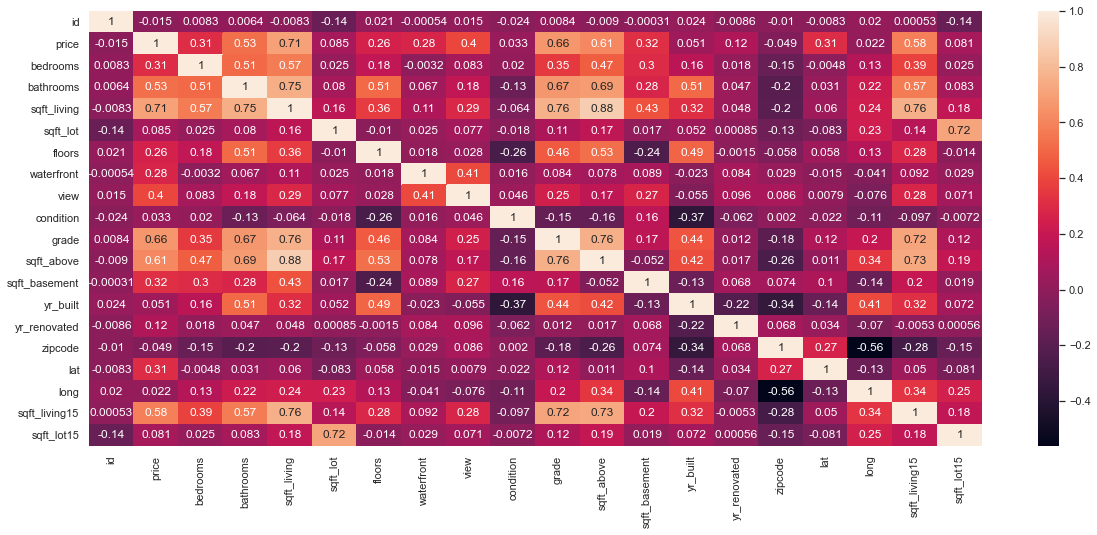

In [89]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(df_que.corr(), annot=True)

In [90]:
X = df_que["sqft_living"]
y = df_que["price"]

sqft_price = sm.OLS(y, sm.add_constant(X)).fit()

In [91]:
simple_model_summary = sqft_price.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:28:01   Log-Likelihood:            -2.1450e+05
No. Observations:               15429   AIC:                         4.290e+05
Df Residuals:                   15427   BIC:                         4.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.62e+04   5268.236    -10.668      0.000   -6.65e+04   -4.59e+04
sqft_living   286.5963      2.311    123.992      0.000     282.066     291.127
==============================================================================
Omnibus:                    10920.696   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451159.757
Skew:                           2.916   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Just everything

In [92]:
X1 = df_que.drop(columns=["price"])
y = df_que["price"]

all_price = sm.OLS(y, sm.add_constant(X1)).fit()

In [93]:
simple_model_summary = all_price.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2009.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:28:05   Log-Likelihood:            -2.1052e+05
No. Observations:               15429   AIC:                         4.211e+05
Df Residuals:                   15410   BIC:                         4.212e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.465e+06   3.52e+06      1.835      0.067   -4.41e+05    1.34e+07
id            -1.087e-06    5.8e-07     -1.875      0.061   -2.22e-06    4.93e-08
bedrooms      -3.708e+04   2247.659    -16.498      0.000   -4.15e+04   -3.27e+04
bathrooms      4.373e+04   3910.981     11.181      0.000    3.61e+04    5.14e+04
sqft_living     115.6157      2.711     42.653      0.000     110.303     120.929
sqft_lot          0.0881      0.057      1.556      0.120      -0.023       0.199
floors         4561.2489   4330.220      1.053      0.292   -3926.493     1.3e+04
waterfront     6.191e+05   2.09e+04     29.607      0.000    5.78e+05     6.6e+05
view            5.36e+04   2587.912     20.711      0.000    4.85e+04    5.87e+04
condition       2.64e+04   2820.804      9.358      0.000    2.09e+04    3.19e+04
grade          9.382e+04   2603.243     36.039      0.000    8.87e+04    9.89e+04
sqft_above       76.5725      2.694     28.419      0.000      71.291      81.854
sqft_basement    39.0456      3.154     12.382      0.000      32.864      45.227
yr_built      -2680.1017     87.108    -30.768      0.000   -2850.844   -2509.360
yr_renovated     20.1897      4.434      4.553      0.000      11.499      28.881
zipcode        -569.8285     39.548    -14.408      0.000    -647.348    -492.309
lat             6.02e+05   1.29e+04     46.846      0.000    5.77e+05    6.27e+05
long          -2.147e+05   1.58e+04    -13.579      0.000   -2.46e+05   -1.84e+05
sqft_living15    16.6056      4.156      3.996      0.000       8.460      24.751
sqft_lot15       -0.3513      0.086     -4.071      0.000      -0.520      -0.182
==============================================================================
Omnibus:                    13395.001   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1472516.729
Skew:                           3.659   Prob(JB):                         0.00
Kurtosis:                      50.297   Cond. No.                     2.19e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.46e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Dropping based on heatmap

In [101]:
X2 = df_que.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15"])
y = df_que["price"]

all_price_1 = sm.OLS(y, sm.add_constant(X2)).fit()

In [102]:
simple_model_summary = all_price_1.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2207.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:29:40   Log-Likelihood:            -2.1135e+05
No. Observations:               15429   AIC:                         4.227e+05
Df Residuals:                   15414   BIC:                         4.228e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.318e+06   3.64e+06      0.636      0.525   -4.82e+06    9.46e+06
id            -5.543e-07    6.1e-07     -0.909      0.364   -1.75e-06    6.42e-07
bedrooms      -4.341e+04   2305.476    -18.829      0.000   -4.79e+04   -3.89e+04
sqft_living     310.8034      3.068    101.306      0.000     304.790     316.817
sqft_lot         -0.0931      0.044     -2.128      0.033      -0.179      -0.007
floors         2.941e+04   4354.414      6.754      0.000    2.09e+04    3.79e+04
waterfront      5.81e+05    2.2e+04     26.364      0.000    5.38e+05    6.24e+05
view           6.877e+04   2676.200     25.695      0.000    6.35e+04     7.4e+04
condition       2.99e+04   2965.711     10.080      0.000    2.41e+04    3.57e+04
sqft_basement   -69.3700      5.268    -13.168      0.000     -79.696     -59.044
yr_built      -1525.2673     83.740    -18.214      0.000   -1689.407   -1361.127
yr_renovated     31.9597      4.627      6.908      0.000      22.891      41.028
zipcode        -697.5884     41.456    -16.827      0.000    -778.847    -616.330
lat            7.022e+05   1.33e+04     52.737      0.000    6.76e+05    7.28e+05
long          -2.932e+05   1.63e+04    -18.038      0.000   -3.25e+05   -2.61e+05
==============================================================================
Omnibus:                    11281.184   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           697024.558
Skew:                           2.925   Prob(JB):                         0.00
Kurtosis:                      35.404   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping based on p(statistic) and heatmap

In [108]:
X3 = df_que.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15", "id"])
y = df_que["price"]

all_price_2 = sm.OLS(y, X3).fit()

In [109]:
simple_model_summary = all_price_2.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              9886.
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:31:39   Log-Likelihood:                     -2.1135e+05
No. Observations:               15429   AIC:                                  4.227e+05
Df Residuals:                   15416   BIC:                                  4.228e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.335e+04   2302.091    -18.831      0.000   -4.79e+04   -3.88e+04
sqft_living     311.1554      3.027    102.783      0.000     305.221     317.089
sqft_lot         -0.0850      0.043     -1.970      0.049      -0.170      -0.000
floors         2.877e+04   4250.813      6.769      0.000    2.04e+04    3.71e+04
waterfront     5.812e+05    2.2e+04     26.375      0.000    5.38e+05    6.24e+05
view           6.854e+04   2664.168     25.728      0.000    6.33e+04    7.38e+04
condition      3.022e+04   2931.880     10.308      0.000    2.45e+04     3.6e+04
sqft_basement   -70.0034      5.188    -13.492      0.000     -80.173     -59.833
yr_built      -1506.2073     77.790    -19.362      0.000   -1658.686   -1353.729
yr_renovated     32.1483      4.619      6.959      0.000      23.094      41.203
zipcode        -676.1093     21.941    -30.815      0.000    -719.116    -633.102
lat            7.022e+05   1.33e+04     52.760      0.000    6.76e+05    7.28e+05
long          -2.946e+05   1.62e+04    -18.195      0.000   -3.26e+05   -2.63e+05
==============================================================================
Omnibus:                    11274.899   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694697.802
Skew:                           2.923   Prob(JB):                         0.00
Kurtosis:                      35.349   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""